# 数据预处理

In [2]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas
df_member = pd.read_csv('易速鲜花会员留存.csv') #载入数据集

df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce') #把总消费字段转换成数值字段
df_member['总消费'] = df_member['总消费'].fillna(0) #补充0值

# 把汉字转换成0、1值
# 使用赋值方式替代 inplace，避免 FutureWarning
df_member['已停付会费'] = df_member['已停付会费'].map({'是': 1, '否': 0})
df_member['性别'] = df_member['性别'].map({'女': 0, '男': 1})

# 其它的是、否字段转换成布尔型数据
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', 
                   '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'
    
# 分类字段哑变量
category_features = ['会员卡类型', '会费支付方式']
df_member = pd.get_dummies(df_member, drop_first=True, columns=category_features)
    
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,True,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,False,True,False,True,False
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,False,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,False,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,True,False,False,True,False
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,False,True,False,True,False
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,False,True,False,False,False
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,False,False,False,True,False


## 构建特征集和标签集

In [3]:
X = df_member.drop(['用户码','已停付会费'], axis = 1) # 构建特征集，用户码字段属于无用特征
y = df_member.已停付会费.values # 构建标签集

## 拆分数据集

In [4]:
from sklearn.model_selection import train_test_split #导入train_test_split模块
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #拆分数据集

# 选择算法
## 逻辑回归模型，导入模型

In [5]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
lr = LogisticRegression() # lr,就代表是逻辑回归模型

## 训练模型

In [6]:
lr.fit(X_train,y_train) # fit,就相当于是梯度下降

/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## 评估分数

In [7]:
print("SK-learn逻辑回归预测准确率{:.2f}%".format(lr.score(X_test,y_test)*100))

SK-learn逻辑回归预测准确率80.06%


## 预测结果

In [8]:
y_pred=lr.predict(X_test)
print("逻辑回归对测试集第一个用户的预测结果", y_pred[0])

逻辑回归对测试集第一个用户的预测结果 0


## 神经网络模型

In [9]:
#!pip install keras
#!pip install tensorflow

In [10]:
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
dnn = Sequential() # 创建一个序贯DNN模型
dnn.add(Dense(units=12, input_dim=17, activation = 'relu')) # 添加输入层
dnn.add(Dense(units=24, activation = 'relu')) # 添加隐层
dnn.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
dnn.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
dnn.compile(optimizer = 'RMSProp', #优化器
            loss = 'binary_crossentropy', #损失函数
            metrics = ['acc']) #评估标准

/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-17 12:16:59.199275: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2026-02-17 12:16:59.199466: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-17 12:16:59.199482: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2026-02-17 12:16:59.199524: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-17 12:16:59.199539: I tensorflow/core/common_runtime/pluggable_device/pl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 553 (2.16 KB)

 Trainable params: 553 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
X_train.shape

(5634, 17)

In [12]:
X_train = np.asarray(X_train).astype(np.float32) # 转换为NumPy张量
X_test = np.asarray(X_test).astype(np.float32) # 转换为NumPy张量

# ⚠️ 保存原始数据副本，用于后续对比
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

X_train.dtype #X_train转换后的类型

dtype('float32')

In [13]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #这里直接从训练集数据中拆分验证集，更方便

Epoch 1/30


2026-02-17 12:16:59.655189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.6827 - loss: 94.1439 - val_acc: 0.6539 - val_loss: 3.8333
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6093 - loss: 5.1059 - val_acc: 0.6575 - val_loss: 2.7623
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6259 - loss: 5.9810 - val_acc: 0.7453 - val_loss: 3.2563
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6328 - loss: 5.7416 - val_acc: 0.7276 - val_loss: 12.4352
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6454 - loss: 5.6665 - val_acc: 0.7169 - val_loss: 12.2924
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6501 - loss: 6.0369 - val_acc: 0.6273 - val_loss: 1.7684
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6363 - loss: 6.0352 - val_acc: 0.3301 - val_loss: 1.5355
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6290 - loss: 5.9417 - val_acc: 0.7436 - val_loss: 8.3291
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6319 - loss: 5.427

In [14]:
import matplotlib.pyplot as plt #导入绘图工具
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Heiti TC']  # macOS 中文字体
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 

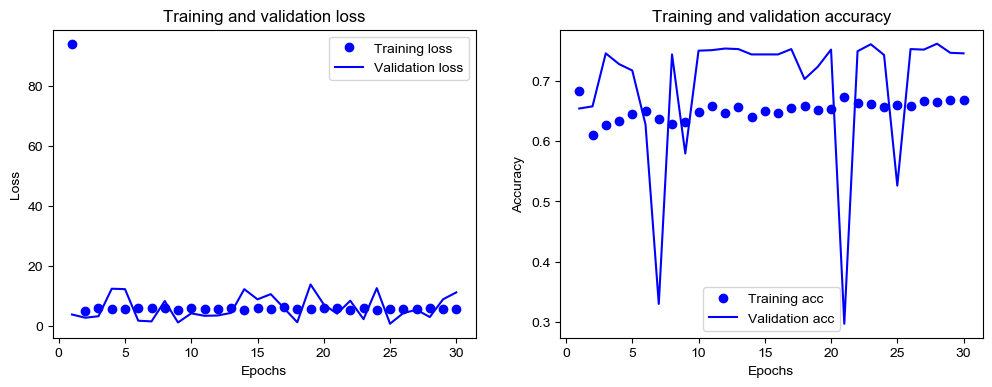

In [15]:
show_history(history) # 调用这个函数

In [16]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN的测试准确率为',"{0:.2f}%".format(result[1]*100))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7793 - loss: 8.0274
DNN的测试准确率为 77.93%


In [17]:
# 预测测试集用户是否流失（非归一化模型）
prediction_raw = dnn.predict(X_test_raw)

# 将概率转换为分类结果（>0.5 为流失，<=0.5 为不流失）
y_pred_dnn_raw = (prediction_raw > 0.5).astype(int)

print('非归一化DNN - 前10个用户预测结果:')
print('流失概率:', prediction_raw[:10].flatten())
print('分类结果 (1=流失, 0=不流失):', y_pred_dnn_raw[:10].flatten())
print(f'\n第一个用户: 流失概率={prediction_raw[0][0]:.2%}, 分类结果={y_pred_dnn_raw[0][0]}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
非归一化DNN - 前10个用户预测结果:
流失概率: [3.4863970e-19 3.1886277e-05 2.9781786e-31 6.0353302e-37 5.1872409e-08
 0.0000000e+00 1.2230386e-10 0.0000000e+00 5.0550647e-10 2.2221712e-04]
分类结果 (1=流失, 0=不流失): [0 0 0 0 0 0 0 0 0 0]

第一个用户: 流失概率=0.00%, 分类结果=0


## 神经网络模型-归一化之后

In [18]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器

# 使用原始数据进行归一化，生成新的变量（不覆盖原始数据）
scaler = MinMaxScaler() #创建归一化缩放器
X_train_norm = scaler.fit_transform(X_train_raw) #拟合并转换训练集数据
X_test_norm = scaler.transform(X_test_raw) #转换测试集数据

print('归一化后数据范围: [{:.2f}, {:.2f}]'.format(X_train_norm.min(), X_train_norm.max()))

归一化后数据范围: [0.00, 1.00]


Epoch 1/30


/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.7091 - loss: 0.5580 - val_acc: 0.7276 - val_loss: 0.5391
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7573 - loss: 0.4899 - val_acc: 0.7613 - val_loss: 0.5001
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7748 - loss: 0.4607 - val_acc: 0.7791 - val_loss: 0.4733
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7870 - loss: 0.4477 - val_acc: 0.7755 - val_loss: 0.4626
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7866 - loss: 0.4412 - val_acc: 0.7782 - val_loss: 0.4585
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7925 - loss: 0.4375 - val_acc: 0.7835 - val_loss: 0.4502
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7894 - loss: 0.4352 - val_acc: 0.7915 - val_loss: 0.4472
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7923 - loss: 0.4337 - val_acc: 0.7879 - val_loss: 0.4449
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7928 - loss: 0.4325 - v

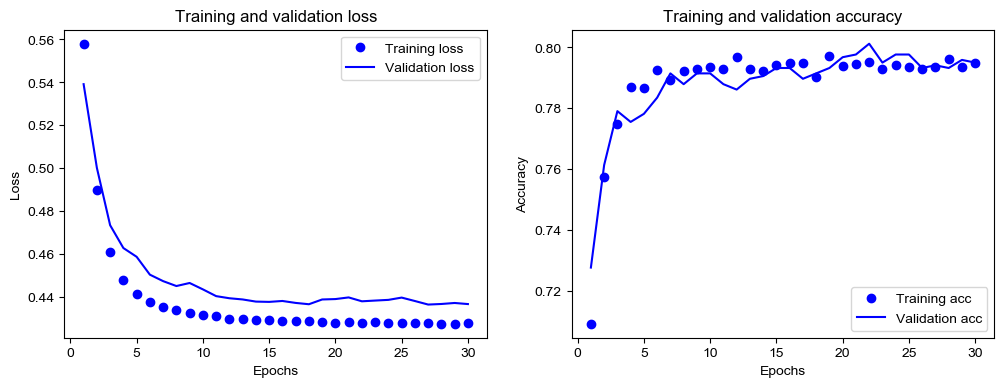

In [19]:
# 创建新的 DNN 模型用于归一化数据（独立于非归一化模型）
from keras.models import Sequential
from keras.layers import Dense

dnn_norm = Sequential()
dnn_norm.add(Dense(units=12, input_dim=17, activation='relu'))
dnn_norm.add(Dense(units=24, activation='relu'))
dnn_norm.add(Dense(units=1, activation='sigmoid'))
dnn_norm.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['acc'])

# 使用归一化数据训练
history_norm = dnn_norm.fit(X_train_norm, y_train,
                            epochs=30,
                            batch_size=64,
                            validation_split=0.2)
show_history(history_norm)

In [20]:
# 使用归一化模型评估（注意使用 dnn_norm 和 X_test_norm）
result_norm = dnn_norm.evaluate(X_test_norm, y_test)
print('DNN（归一化之后）的测试准确率为',"{0:.2f}%".format(result_norm[1]*100))

# 预测
prediction_norm = dnn_norm.predict(X_test_norm)
y_pred_dnn_norm = (prediction_norm > 0.5).astype(int)

print('\n归一化DNN - 前10个用户预测结果:')
print(y_pred_dnn_norm[:10].flatten())

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8020 - loss: 0.4106
DNN（归一化之后）的测试准确率为 80.20%
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

归一化DNN - 前10个用户预测结果:
[0 0 0 0 1 0 1 0 0 0]


# 性能评估
## 混淆矩阵

In [21]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
import seaborn as sns #导入seaborn画图工具箱
def show_matrix(y_test, y_pred): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title("混淆矩阵") # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图
    plt.show() # 显示混淆矩阵

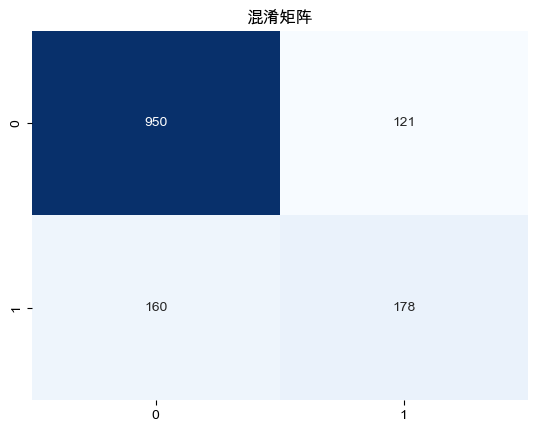

In [22]:
# 逻辑回归
show_matrix(y_test, y_pred)

非归一化 DNN 混淆矩阵：


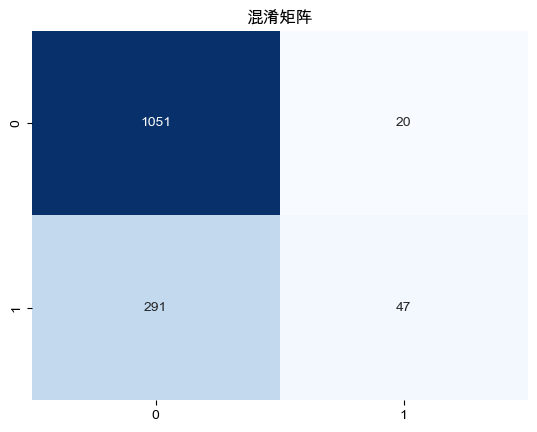

In [23]:
# 非归一化DNN
print("非归一化 DNN 混淆矩阵：")
show_matrix(y_test, y_pred_dnn_raw)

归一化 DNN 混淆矩阵：


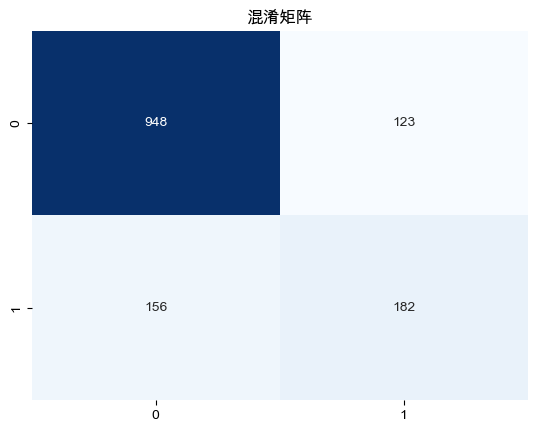

In [24]:
# 归一化DNN
print("归一化 DNN 混淆矩阵：")
show_matrix(y_test, y_pred_dnn_norm)

In [25]:
# ============ 模型对比总结 ============
from sklearn.metrics import accuracy_score

print("=" * 50)
print("模型准确率对比")
print("=" * 50)

# 逻辑回归准确率
acc_lr = accuracy_score(y_test, y_pred)
print(f"逻辑回归:        {acc_lr*100:.2f}%")

# 非归一化DNN准确率
acc_dnn_raw = accuracy_score(y_test, y_pred_dnn_raw)
print(f"DNN（非归一化）: {acc_dnn_raw*100:.2f}%")

# 归一化DNN准确率
acc_dnn_norm = accuracy_score(y_test, y_pred_dnn_norm)
print(f"DNN（归一化）:   {acc_dnn_norm*100:.2f}%")

print("-" * 50)
print(f"归一化提升: {(acc_dnn_norm - acc_dnn_raw)*100:+.2f}%")

模型准确率对比
逻辑回归:        80.06%
DNN（非归一化）: 77.93%
DNN（归一化）:   80.20%
--------------------------------------------------
归一化提升: +2.27%


## 精确率


In [26]:
from sklearn.metrics import precision_score

# 计算3个模型的精确率
precision_lr = precision_score(y_test, y_pred)
precision_dnn_raw = precision_score(y_test, y_pred_dnn_raw)
precision_dnn_norm = precision_score(y_test, y_pred_dnn_norm)

print("=" * 50)
print("模型精确率对比 (Precision)")
print("=" * 50)
print(f"逻辑回归:        {precision_lr*100:.2f}%")
print(f"DNN（非归一化）: {precision_dnn_raw*100:.2f}%")
print(f"DNN（归一化）:   {precision_dnn_norm*100:.2f}%")
print("-" * 50)
print("精确率 = TP / (TP + FP)")
print("含义: 预测为流失的用户中，实际流失的比例")

模型精确率对比 (Precision)
逻辑回归:        59.53%
DNN（非归一化）: 70.15%
DNN（归一化）:   59.67%
--------------------------------------------------
精确率 = TP / (TP + FP)
含义: 预测为流失的用户中，实际流失的比例


## 召回率

In [27]:
from sklearn.metrics import recall_score

# 计算3个模型的召回率
recall_lr = recall_score(y_test, y_pred)
recall_dnn_raw = recall_score(y_test, y_pred_dnn_raw)
recall_dnn_norm = recall_score(y_test, y_pred_dnn_norm)

print("=" * 50)
print("模型召回率对比 (Recall)")
print("=" * 50)
print(f"逻辑回归:        {recall_lr*100:.2f}%")
print(f"DNN（非归一化）: {recall_dnn_raw*100:.2f}%")
print(f"DNN（归一化）:   {recall_dnn_norm*100:.2f}%")
print("-" * 50)
print("召回率 = TP / (TP + FN)")
print("含义: 实际流失的用户中，被正确预测出来的比例")

模型召回率对比 (Recall)
逻辑回归:        52.66%
DNN（非归一化）: 13.91%
DNN（归一化）:   53.85%
--------------------------------------------------
召回率 = TP / (TP + FN)
含义: 实际流失的用户中，被正确预测出来的比例


## 分类报告

In [31]:
from sklearn.metrics import classification_report

# 逻辑回归分类报告
print("逻辑回归 分类报告")
print(classification_report(y_test, y_pred, target_names=['未流失', '流失']))

# 非归一化DNN分类报告
print("DNN（非归一化）分类报告")
print(classification_report(y_test, y_pred_dnn_raw, target_names=['未流失', '流失']))

# 归一化DNN分类报告
print("DNN（归一化）分类报告")
print(classification_report(y_test, y_pred_dnn_norm, target_names=['未流失', '流失']))

逻辑回归 分类报告
              precision    recall  f1-score   support

         未流失       0.86      0.89      0.87      1071
          流失       0.60      0.53      0.56       338

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409

DNN（非归一化）分类报告
              precision    recall  f1-score   support

         未流失       0.78      0.98      0.87      1071
          流失       0.70      0.14      0.23       338

    accuracy                           0.78      1409
   macro avg       0.74      0.56      0.55      1409
weighted avg       0.76      0.78      0.72      1409

DNN（归一化）分类报告
              precision    recall  f1-score   support

         未流失       0.86      0.89      0.87      1071
          流失       0.60      0.54      0.57       338

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.80      0.80    

In [32]:
## ROC与AUC
from sklearn.metrics import roc_curve #导入roc_curve工具
from sklearn.metrics import auc #导入auc工具

fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(y_test, prediction_norm)
auc_dnn = auc(fpr_dnn, tpr_dnn) #神经网络 AUC值

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred) #逻辑回归 TPR FPR和ROC曲线
auc_lr = auc(fpr_lr, tpr_lr) #逻辑回归 AUC值

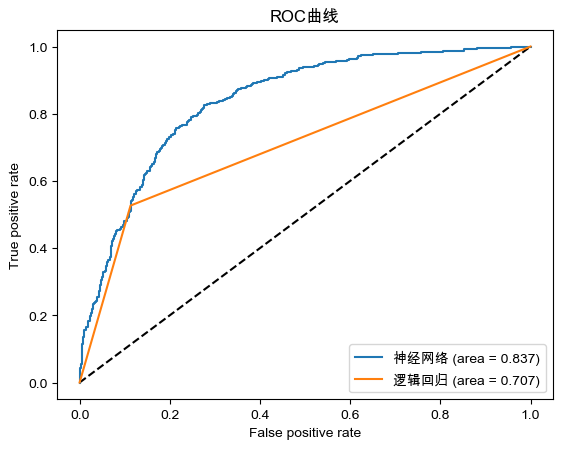

In [35]:
plt.plot([0, 1], [0, 1], 'k--') #设定对角线
plt.plot(fpr_dnn, tpr_dnn, label='神经网络 (area = {:.3f})'.format(auc_dnn)) #绘制神经网络ROC曲线
plt.plot(fpr_lr, tpr_lr, label='逻辑回归 (area = {:.3f})'.format(auc_lr)) #绘制逻辑回归ROC曲线
plt.xlabel('False positive rate') #X轴FPR
plt.ylabel('True positive rate') #Y轴TPR
plt.title('ROC曲线') #图题
plt.legend(loc='best') #图例
plt.show() #绘图